In [1]:
import pandas as pd  
import numpy as np    

# INTRODUÇÃO

As unidades básicas de trabalho com Pandas são as <b>'Series'</b> e os <b>'DataFrames'</b>. 

Series nada mais são do que um conjunto de elementos de 1 dimensão com índices. Series podem conter basicamente qualquer objeto: int , float, string, etc...
A forma mais fácil para criar uma series é através da função <i>pd.Series(data=, index=):</i>

In [2]:
# usando uma lista
s = pd.Series (data = [5, 6, 8, -3, 9])
print (s, '\n')

# usando um dicionário
d = {'Campeão': 'Flamengo', 'Vice':'Vasco', 'Terceiro':'Bangu'}
s2 = pd.Series(d)
print (s2, '\n')

# usando um numpy array
dados = np.random.random(4)
indices = np.arange(0, 8, 2)
s3 = pd.Series(data = dados, index = indices)
print(s3, '\n')

# usando uma variável escalável
s4 = pd.Series(-9, index=['a', 'b', 'c', 'd'])
print (s4)

0    5
1    6
2    8
3   -3
4    9
dtype: int64 

Campeão     Flamengo
Terceiro       Bangu
Vice           Vasco
dtype: object 

0    0.033355
2    0.727522
4    0.503550
6    0.743591
dtype: float64 

a   -9
b   -9
c   -9
d   -9
dtype: int64


## <u>DataFrames: </u>

 são simplesmente um conjunto de séries que compartilham o mesmo índice. Similiar a uma tabela ou planilha do excel. É objeto Pandas mais utilizado! Por isso é muito importante dominar todas as operações que envolvam dataframes. Existem várias formas de criar dataframes, vamos ver as mais importantes:

1)  Através da função:   <i>pd.DataFrame(data= , index= , columns=)

In [3]:
# Data aceita diferentes inputs:

# Dicionário
d = {'Times Paulistas': ['São Paulo', 'Santos', 'Corinthians'], 
     'Times Cariocas': ['Flamengo', 'Fluminense', 'Botafogo'], 
     'Times Ruins': ['Palmeiras', 'Vasco', 'Remo']}
df = pd.DataFrame(d)
print(df, '\n')

# Arrays
dados = np.random.random((5,3))
df2 = pd.DataFrame(data = dados, index = np.arange(5), columns = np.random.randint(1, 100, 3))
print (df2, '\n')

# Listas ou Tuplas
listas = [[9,3,6], [6,2,9], [6,1,6]]
df3 = pd.DataFrame(listas, index = (2,3,4), columns = ['A', 'B', 'C'])
print (df3)

  Times Cariocas Times Paulistas Times Ruins
0       Flamengo       São Paulo   Palmeiras
1     Fluminense          Santos       Vasco
2       Botafogo     Corinthians        Remo 

         75        50        91
0  0.531650  0.818481  0.098567
1  0.869360  0.554101  0.150722
2  0.590369  0.475811  0.931915
3  0.700357  0.884596  0.877960
4  0.224072  0.631175  0.365691 

   A  B  C
2  9  3  6
3  6  2  9
4  6  1  6


2)   Por leitura de arquivo de diferentes formatos com os métodos:  
    <i>pd.read_csv();
    pd.read_excel();
    pd.read_pickle();
    pd.read_sql();
    pd.read_json();
    pd.read_html() e outros...
    

In [4]:
# basta passar a localização do arquivo para criar um novo dataframe

df = pd.read_csv('iris.csv', index_col='Id')
df.head()      #  o método head() retorna as primeiras cinco linhas do dataframe

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


Veja que só passamos como argumento 'iris.csv', isso porque o arquivo csv estava na mesma pasta que o nosso código, caso contrário seria necessário passar todo o caminho, exemplo: "c:/users/exemplo/pasta/arquivo.csv".
O dataset (conjunto de dados) iris.csv foi baixado de kaggle.com e contém características de três espécies de flores.
O parâmetro index_col foi usado para selecionar uma coluna do arquivo csv que contém o índice (opcional).

Todos os outros métodos são bem semelhantes, o que muda um pouco é o read_html(). Veja o exemplo:

In [5]:
# Criamos um dataframe chamado fut e passamos o link que contém a tabela que queremos:
fut = pd.read_html("https://pt.wikipedia.org/wiki/Campeonato_Carioca_de_Futebol")
print("Quantidade de tabelas:", len(fut))

Quantidade de tabelas: 56


Perceba que o Pandas pega todas as tabelas presentes na página, como só queremos uma delas, selecionamos a escolhida:

In [6]:
fut = fut[5]    # veremos mais para frente como selecionar os dados de interesse no df e como torná-lo mais apresentável
fut.head()

,0,1,2,3,4
0,Clube,Títulos,Vices,Terceiro lugar,Quarto lugar
1,Flamengo,"34 (1914, 1915, 1920, 1921, 1925, 1927, 1939, ...","31 (1912(2), 1919, 1922, 1923, 1924(2), 1932, ...","14 (1913, 1917, 1935(3), 1946, 1957, 1964, 196...","14 (1916, 1918, 1928, 1945, 1948, 1949, 1951, ..."
2,Fluminense,"31 (1906, 1907(1), 1908, 1909, 1911, 1917, 191...","22 (1910, 1915, 1920, 1925, 1927, 1933(2), 193...","23 (1922, 1926, 1942, 1948, 1952, 1962, 1965, ...","19 (1914, 1923, 1929, 1939, 1944, 1947, 1955, ..."
3,Vasco da Gama,"24 (1923, 1924(1), 1929, 1934(1), 1936(1), 194...","24 (1926, 1928, 1930, 1931, 1935(2), 1944, 194...","13 (1925, 1933(3), 1937, 1940, 1955, 1972, 197...","18 (1927, 1938, 1941, 1943, 1953, 1954, 1957, ..."
4,Botafogo,"20 (1907(1), 1910, 1912(1), 1930, 1932, 1933(1...","20 (1908, 1909, 1913, 1914, 1916, 1918, 1939, ...","21 (1919, 1928, 1938, 1941, 1944, 1949, 1951, ...","26 (1906, 1915, 1920, 1922, 1924(4), 1925, 193..."


### Output:

Pandas dá a opção de salvar nosso df em diferentes formatos: (análogo aos métodos de leitura)

    to_csv(); to_excel(), to_pickle(), to_json(), to_sql(), to_html e outros...

In [7]:
# Aquela tabela que lemos no formato .html, podemos salvar assim:

fut.to_excel('Tabela dos Campeões.xlsx')           # Excel
fut.to_csv('Tabela dos Campeões.csv')              # Arquivo .csv
fut.to_pickle('Tabela dos Campeões.pickle')        # Pickle

# Atributos e Funções:

Podemos obter muitas informações dos nossos dataframes, para isso basta conhecer as principais funções disponíveis:

.head() e .tail()

In [8]:
# Criamos nosso dataframe
df = pd.read_csv('iris.csv', index_col='Id')

# Como já vimos, para retornar as n primeiras usamos:
print(df.head(4))   # se não passar nenhum valor, o padrão é 5

# Para ver as últimas linhas do nosso df:
print(df.tail(3))

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
Id                                                                           
148            6.5           3.0            5.2           2.0  Iris-virginica
149            6.2           3.4            5.4           2.3  Iris-virginica
150            5.9           3.0            5.1           1.8  Iris-virginica


In [9]:
# Para obter as colunas de seu dataframe:

print (df.columns)

# Para obter os índices de seu dataframe:

print (df.index)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            141, 142, 143, 144, 145, 146, 147, 148, 149, 150],
           dtype='int64', name='Id', length=150)


Para obter informações rápidas, use os métodos .info() e .describe()

In [10]:
# Retorna quantidade de linhas, colunas, tipo de dados...

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [11]:
# Retorna um df com contagem, média, soma, desvio padrão, quartis e valores mínimos e máximos de cada coluna :

df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
# Podemos obter cada informação acima em uma Series, aplicando as funções:

print(df.count())
print(df.mean())
print(df.std())
print(df.min())
print(df.max())

SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64
SepalLengthCm    5.843333
SepalWidthCm     3.054000
PetalLengthCm    3.758667
PetalWidthCm     1.198667
dtype: float64
SepalLengthCm    0.828066
SepalWidthCm     0.433594
PetalLengthCm    1.764420
PetalWidthCm     0.763161
dtype: float64
SepalLengthCm            4.3
SepalWidthCm               2
PetalLengthCm              1
PetalWidthCm             0.1
Species          Iris-setosa
dtype: object
SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object


In [13]:
# Para obter a soma e o produto de cada coluna do df:

print(df.sum())
print(df.prod())

SepalLengthCm                                                876.5
SepalWidthCm                                                 458.1
PetalLengthCm                                                563.8
PetalWidthCm                                                 179.8
Species          Iris-setosaIris-setosaIris-setosaIris-setosaIr...
dtype: object
SepalLengthCm    2.257440e+114
SepalWidthCm      1.197477e+72
PetalLengthCm     3.774489e+76
PetalWidthCm      2.972714e-12
dtype: float64


In [14]:
# A função .corr() faz a correlação de todos os atributos, excluindo NaN values:

df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


#### Para ser aplicado nas colunas (lembre que cada coluna de um df é um Series):

In [15]:
# Para saber quais são os valores únicos que determinada coluna possui, use .unique()

df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
# Existem duas formas de saber a quantidade de valores únicos:

print(len(df['Species'].unique()))
print(df['Species'].nunique())

3
3


In [17]:
# Outro método importante é o .value_counts() , retorna a contagem de cada valor presente na coluna:

df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

# Seleção e Indexação:

In [18]:
# Dataframe de Exemplo
df = pd.DataFrame({'Times_Paulistas': ['São Paulo', 'Santos', 'Corinthians'], 
     'Times_Cariocas': ['Flamengo', 'Fluminense', 'Botafogo'], 
     'Times_Ruins': ['Palmeiras', 'Vasco', 'Remo']}, index = ['Campeão', 'Vice', 'Terceiro'])
df

,Times_Cariocas,Times_Paulistas,Times_Ruins
Campeão,Flamengo,São Paulo,Palmeiras
Vice,Fluminense,Santos,Vasco
Terceiro,Botafogo,Corinthians,Remo


Existem duas formas de selecionar <u>colunas</u> do seu df:

In [19]:
df.Times_Paulistas

# ou, a minha preferência pessoal:

df['Times_Paulistas']

Campeão       São Paulo
Vice             Santos
Terceiro    Corinthians
Name: Times_Paulistas, dtype: object

In [20]:
# Para pegar mais de uma coluna, basta:

df[['Times_Paulistas', 'Times_Cariocas']]    # perceba que estamos passando uma lista de colunas ao invés de uma coluna,
                                             # por isso os colchetes duplos... Retorna um dataframe!

,Times_Paulistas,Times_Cariocas
Campeão,São Paulo,Flamengo
Vice,Santos,Fluminense
Terceiro,Corinthians,Botafogo


Existem duas formas para selecionar <u>linhas</u>:  pela posição ou pelo nome do index

In [21]:
# Pela posição, com iloc[]:

df.iloc[0]

Times_Cariocas      Flamengo
Times_Paulistas    São Paulo
Times_Ruins        Palmeiras
Name: Campeão, dtype: object

In [22]:
# Pelo nome do índice:

df.loc['Vice']

Times_Cariocas     Fluminense
Times_Paulistas        Santos
Times_Ruins             Vasco
Name: Vice, dtype: object

In [23]:
# Para escolher uma única célula, use os rótulos da coluna e da linha:

df['Times_Ruins']['Vice']

'Vasco'

In [24]:
# Adicionar colunas é muito simples

df['Nova Coluna'] = [1,2,3]

### Índices:

In [25]:
# Para mudar o índice - escolhemos como índice a nova coluna

df.set_index('Nova Coluna')  

,Times_Cariocas,Times_Paulistas,Times_Ruins
Nova Coluna,,,
1,Flamengo,São Paulo,Palmeiras
2,Fluminense,Santos,Vasco
3,Botafogo,Corinthians,Remo


ATENÇÃO!!! A maioria das mudanças que fizermos nos dataframes não é permanente, na verdade o Pandas cria um novo objeto
e retorna o mesmo. 
Isso evita a perda de informação acidental. Para que a mudança seja permanente, use o parâmetro <i>inplace = True

In [26]:
# Nesse caso não tem sentido mudar o índice, mas veja que a mudança não é permanente

df

,Times_Cariocas,Times_Paulistas,Times_Ruins,Nova Coluna
Campeão,Flamengo,São Paulo,Palmeiras,1
Vice,Fluminense,Santos,Vasco,2
Terceiro,Botafogo,Corinthians,Remo,3


In [27]:
# Para resetar o índice, fazendo com que a mudança seja permanente

df.reset_index(inplace = True)
df

,index,Times_Cariocas,Times_Paulistas,Times_Ruins,Nova Coluna
0,Campeão,Flamengo,São Paulo,Palmeiras,1
1,Vice,Fluminense,Santos,Vasco,2
2,Terceiro,Botafogo,Corinthians,Remo,3


### Dando um tapa no visu:

Boa parte do trabalho de um cientista de dados, consiste em organizar e limpar os dados de forma que seja mais fácil analisá-los

In [28]:
# Voltando para o nosso antigo dataframe 'fut'
# escolhemos o header(linha com os nomes das colunas) e o índice no momento de chamar a função 

fut = pd.read_csv("Tabela dos Campeões.csv", encoding = "ISO-8859-1", header= 1, index_col=1)
fut.head()

,0,Títulos,Vices,Terceiro lugar,Quarto lugar
Clube,,,,,
Flamengo,1,"33 (1914, 1915, 1920, 1921, 1925, 1927, 1939, ...","31 (1912(2), 1919, 1922, 1923, 1924(2), 1932, ...","14 (1913, 1917, 1935(3), 1946, 1957, 1964, 196...","14 (1916, 1918, 1928, 1945, 1948, 1949, 1951, ..."
Fluminense,2,"31 (1906, 1907(1), 1908, 1909, 1911, 1917, 191...","21 (1910, 1915, 1920, 1925, 1927, 1933(2), 193...","23 (1922, 1926, 1942, 1948, 1952, 1962, 1965, ...","19 (1914, 1923, 1929, 1939, 1944, 1947, 1955, ..."
Vasco da Gama,3,"24 (1923, 1924(1), 1929, 1934(1), 1936(1), 194...","24 (1926, 1928, 1930, 1931, 1935(2), 1944, 194...","13 (1925, 1933(3), 1937, 1940, 1955, 1972, 197...","18 (1927, 1938, 1941, 1943, 1953, 1954, 1957, ..."
Botafogo,4,"20 (1907(1), 1910, 1912(1), 1930, 1932, 1933(1...","20 (1908, 1909, 1913, 1914, 1916, 1918, 1939, ...","21 (1919, 1928, 1938, 1941, 1944, 1949, 1951, ...","26 (1906, 1915, 1920, 1922, 1924(4), 1925, 193..."
America,5,"7 (1913, 1916, 1922, 1928, 1931, 1935(1) e 1960)","7 (1911, 1917, 1921, 1929, 1950, 1954 e 1955)","17 (1908, 1909, 1910, 1912(3), 1914, 1915, 192...","4 (1946, 1968, 1970 e 1983)"


In [29]:
# Deleta as colunas indesejadas

fut.drop(['0', 'Quarto lugar'], axis=1, inplace = True)

In [30]:
fut.head(2)

,Títulos,Vices,Terceiro lugar
Clube,,,
Flamengo,"33 (1914, 1915, 1920, 1921, 1925, 1927, 1939, ...","31 (1912(2), 1919, 1922, 1923, 1924(2), 1932, ...","14 (1913, 1917, 1935(3), 1946, 1957, 1964, 196..."
Fluminense,"31 (1906, 1907(1), 1908, 1909, 1911, 1917, 191...","21 (1910, 1915, 1920, 1925, 1927, 1933(2), 193...","23 (1922, 1926, 1942, 1948, 1952, 1962, 1965, ..."


In [31]:
# Pegando apenas o valor de interesse em cada célula - vamos aprender isso em breve

fut['Títulos'] = fut['Títulos'].apply(lambda x: int(x.split()[0]))
fut['Vices'] = fut['Vices'].apply(lambda x: int(x.split()[0]))
fut['Terceiro lugar'] = fut['Terceiro lugar'].apply(lambda x: int(x.split()[0]))

In [32]:
# Agora temos um dataframe bem organizado

fut = fut.head(5)  # pegamos só as cinco primeiras linhas para facilitar a visualização dos exemplos
fut

,Títulos,Vices,Terceiro lugar
Clube,,,
Flamengo,33,31,14
Fluminense,31,21,23
Vasco da Gama,24,24,13
Botafogo,20,20,21
America,7,7,17


### SELEÇÃO CONDICIONAL:

In [33]:
# Passando uma condição para o df, obtem-se um df com variáveis booleanas, que satisfazem essa condição, exemplo:

fut>22    # retorna True onde os valores forem maiores que 22

,Títulos,Vices,Terceiro lugar
Clube,,,
Flamengo,True,True,False
Fluminense,True,False,True
Vasco da Gama,True,True,False
Botafogo,False,False,False
America,False,False,False


In [34]:
# Para fazer uma selação condicional, passamos a condição como se fosse um índice:

fut[fut>22]  # ou seja, quero os valores do df fut, apenas onde esses valores sejam maiores que 22

,Títulos,Vices,Terceiro lugar
Clube,,,
Flamengo,33.0,31.0,NaN
Fluminense,31.0,NaN,23.0
Vasco da Gama,24.0,24.0,NaN
Botafogo,NaN,NaN,NaN
America,NaN,NaN,NaN


In [35]:
# Outro exemplo: para saber quem tem mais títulos:

fut['Títulos'][ fut['Títulos'] == fut['Títulos'].max() ]

'''
Destrinchando essa linha acima:

fut['Títulos'].max() retorna o valor máximo da coluna títulos
fut['Títulos'] == fut['Títulos'].max() é a condição que estamos passando, ou seja, quero os valores da coluna Títulos, apenas 
onde o valor seja igual ao valor máximo

''' 


"\nDestrinchando essa linha acima:\n\nfut['Títulos'].max() retorna o valor máximo da coluna títulos\nfut['Títulos'] == fut['Títulos'].max() é a condição que estamos passando, ou seja, quero os valores da coluna Títulos, apenas \nonde o valor seja igual ao valor máximo\n\n"

In [36]:
# Um método mais simples para comparar valores de uma coluna:

fut['Vices'].sort_values()

# Perceba que o Vasco está em segundo lugar, ou seja, ele é o vice dos vices! rsrsrsrs

Clube
America           7
Botafogo         20
Fluminense       21
Vasco da Gama    24
Flamengo         31
Name: Vices, dtype: int64

In [37]:
# Criando uma nova coluna

fut['Pódios'] = fut['Títulos'] + fut['Vices'] + fut['Terceiro lugar']

In [38]:
fut

,Títulos,Vices,Terceiro lugar,Pódios
Clube,,,,
Flamengo,33,31,14,78
Fluminense,31,21,23,75
Vasco da Gama,24,24,13,61
Botafogo,20,20,21,61
America,7,7,17,31


## AGRUPAMENTO:

In [1]:
import pandas as pd

Em alguns momentos é importante agrupar os dados de nosso dataframe de acordo com determinada característica. <br>
Para isso, usamos a função <i>pd.groupby()</i>

In [2]:
d = {"Time": ['Flamengo','Flamengo','Vasco','Vasco'],
    "Jogador": ['Romário', 'Zico' , 'Edmundo', 'Amaral'],
     "Gols": [95, 105, 24, -1],
    "Casamentos": [8, 3, 2, -2]}

df = pd.DataFrame(d)
df = df[['Time', 'Jogador', 'Gols', 'Casamentos']]  # para colocar as colunas na ordem desejada
df

,Time,Jogador,Gols,Casamentos
0,Flamengo,Romário,95,8
1,Flamengo,Zico,105,3
2,Vasco,Edmundo,24,2
3,Vasco,Amaral,-1,-2


In [3]:
# Caso queiramos agrupar nosso dataframe por time para saber a número total de gols ou a média de gols
# É interessante perceber que temos tb que passar um função, caso contrário temos apenas um objeto pandas

df.groupby(by='Time').sum()          # maneira mais pythonica!

agrupado = df.groupby(by='Time')     # outra forma de fazer a mesma coisa
agrupado.sum()

,Gols,Casamentos
Time,,
Flamengo,200,11
Vasco,23,0


In [4]:
# Para a função ser aplicada apenas nas colunas de interesse:

df.groupby('Time')['Gols'].mean()

Time
Flamengo    100.0
Vasco        11.5
Name: Gols, dtype: float64

In [5]:
# Perceba que quando aplicamos groupby no df, ele nos retorna outro df. Isso significa que podemos 
# usar todas aquelas funções dos tutoriais anteriores

df.groupby('Time').describe()

Casamentos        Gols
Time                                  
Flamengo count    2.000000    2.000000
         mean     5.500000  100.000000
         std      3.535534    7.071068
         min      3.000000   95.000000
         25%      4.250000   97.500000
         50%      5.500000  100.000000
         75%      6.750000  102.500000
         max      8.000000  105.000000
Vasco    count    2.000000    2.000000
         mean     0.000000   11.500000
         std      2.828427   17.677670
         min     -2.000000   -1.000000
         25%     -1.000000    5.250000
         50%      0.000000   11.500000
         75%      1.000000   17.750000
         max      2.000000   24.000000

## DADOS AUSENTES:

Nessa seção vamos aprender como lidar com tabelas incompletas

In [6]:
import pandas as pd

In [7]:
# Usaremos os dados dos passageiros do Titanic, disponível em kaggle.com

df = pd.read_csv('titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Perceba que algumas células do nosso dataframe contém <b>NaN</b>, que significa <i>not a number</i>, o que é apenas uma forma
de dizer que a não se tem aquela informação, o dado está ausente.

A função <i>isnull()</i> retorna um df de variáveis booleanas indicando se a informação está ausente

In [9]:
df.isnull().head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False


In [10]:
# Para saber a quantidade de células com Nan, podemos fazer:

df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

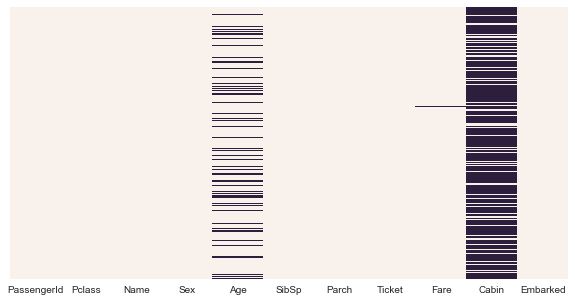

In [11]:
# Só para facilitar a visualização dos dados ausentes - para saber mais leia o tutorial 'Seaborn'
# Em preto, os dados ausentes

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)


E agora? Temos 3 colunas com falta de informações - Age (idade), Fare (taxa) e Cabin (cabine). 
O que fazer? Como resolver esse problema?

Não existe uma maneira correta ou única para resolver isso, vai depender de cada caso. Algumas opções são:

a) Apagar a coluna;    b) Apagar a linha;   c) Preencher com algum valor

In [12]:
# Vamos resolver o problema da Cabine. Nessa coluna temos 327 valores nulos. Vimos que nosso dataframe tem 418 linhas,
# ou seja, aqui não dá pra fazer muita coisa, melhor apagar toda coluna:

df.drop('Cabin', axis=1, inplace = True) # axis é o eixo: 0 p linha e 1 p coluna
                                         # lembre sempre do inplace = True, para que a mudança seja permanente no nosso df

In [13]:
df.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [14]:
# Agora vamos para a coluna de idade, uma opção aqui seria preencher os valores ausentes com a média de todas as idades

df['Age'].mean()

30.272590361445783

In [15]:
# Uma solução mais elegante e mais correta seria pegar a média dos passageiros de cada classe para preencher os
# valores, posso fazer isso com o groupby

df.groupby('Pclass')['Age'].mean()

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [16]:
# Agora é só criar uma função para preencher os valores que faltam com as médias calculadas:

def preenchedor(cols):   # a função será aplicada em uma lista de colunas
    Idade = cols[0]      # sendo que a primeira é a da Idade, index =[0]
    Classe = cols[1]     # e a segunda é a da Classe, index = [1]
    
    if pd.isnull(Idade):     # se o valor na coluna da idade for NaN
        if Classe == 1:          # e se pertencer a primeira classe
            return 41            # retorna a média de idade da 1ª classe = 41
        elif Classe == 2:
            return 29            # mesma coisa para 2ª classe
        else:
            return 24            # e para a 3ª classe
    else:                   # mas se o valor da idade não for Nan  
        return Idade             # recebe a própria Idade
    

# Créditos para a função acima: Jose Portilla - Pierian Data

In [17]:
# Aplicando a função para modificar a coluna Age

df['Age'] = df[['Age','Pclass']].apply(preenchedor, axis=1)

In [18]:
# Agora que resolver os maiores problemas, só sobrou um dado ausente na coluna Taxa(fare), como uma
# linha não vai fazer falta, podemos apagá-la

df.dropna(inplace=True)

In [19]:
# Agora nosso dataframe está tinindo, pronto para ser utilizado:

df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

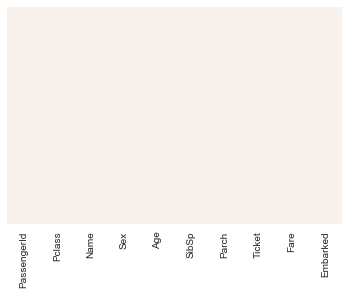

In [20]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

# JUNTAR DATAFRAMES

As três principais funções para unir dataframes são: <i>  .concat(), .join() e .merge()</i><br>
Vamos ver as diferenças entre elas e quando usar cada uma.

In [21]:
# Temos 2 dataframes df1 e df2

df1 = pd.DataFrame(columns= 'A B C'.split(), index= [0,1,2], data=[['a1','b1','c1'],
                                                                   ['a2', 'b2', 'c2'], 
                                                                   ['a3', 'b3', 'c3']])
df2 = pd.DataFrame(columns= 'A B C'.split(), index= [3,4,5], data=[['a3','b3','c3'],
                                                                   ['a4', 'b4', 'c4'], 
                                                                   ['a5', 'b5', 'c5']])

df3 = pd.DataFrame(columns= 'D E F'.split(), index= [0, 1, 2], data=[['d1','e1','f1'],
                                                                   ['d2', 'e2', 'f2'], 
                                                                   ['d3', 'e3', 'f3']])

In [22]:
df1

,A,B,C
0,a1,b1,c1
1,a2,b2,c2
2,a3,b3,c3


In [23]:
df2

,A,B,C
3,a3,b3,c3
4,a4,b4,c4
5,a5,b5,c5


<b> CONCAT ( ) : </b>  basicamente cola dois ou mais dataframes juntos

In [24]:
# A primeira função que veremos é a 'concat'. Ela basicamente junta dois dataframes.

pd.concat([df1, df2])  # passamos uma lista com os df a serem concatenados

,A,B,C
0,a1,b1,c1
1,a2,b2,c2
2,a3,b3,c3
3,a3,b3,c3
4,a4,b4,c4
5,a5,b5,c5


In [25]:
# Para juntar pelo eixo das colunas, use 'axis=1'. No nosso caso, resultou em alguns valores NaN, pois os df originais
# não possuem a informação das respectivas células

pd.concat([df1, df2], axis=1)

,A,B,C,A,B,C
0,a1,b1,c1,NaN,NaN,NaN
1,a2,b2,c2,NaN,NaN,NaN
2,a3,b3,c3,NaN,NaN,NaN
3,NaN,NaN,NaN,a3,b3,c3
4,NaN,NaN,NaN,a4,b4,c4
5,NaN,NaN,NaN,a5,b5,c5


In [26]:
# Um bom uso para o 'axis=1' seria na concatenação do df1 com o df3, pois compartilham o mesmo índice com colunas diferentes

pd.concat([df1, df3], axis=1)

,A,B,C,D,E,F
0,a1,b1,c1,d1,e1,f1
1,a2,b2,c2,d2,e2,f2
2,a3,b3,c3,d3,e3,f3


<b> JOIN( ): </b> faz a união de dataframes no índice ou em alguma coluna (transformado em índice)

In [27]:
# Suponha que você tenha 2 df com informações sobre funcionários de uma empresa

func1 = pd.DataFrame(columns=['Experiência', 'Vendas Totais'], index = ['José', 'João', 'Pedro'], data=[['15 anos', 20000 ],
                                                                                                     ['10 anos',15000 ],
                                                                                                     ['2 anos', 10000]])
func2 = pd.DataFrame(columns=['Idade', 'Salário'], index = ['José', 'João', 'Paulo'], data=[['55 anos', 10000 ],
                                                                                          ['40 anos', 7500 ],
                                                                                          ['22 anos', 5000]])

In [28]:
func1   # func1 tem dados sobre Pedro, mas não sobre Paulo

,Experiência,Vendas Totais
José,15 anos,20000
João,10 anos,15000
Pedro,2 anos,10000


In [29]:
func2  # func2 tem dados sobre Paulo, mas não sobre Pedro

,Idade,Salário
José,55 anos,10000
João,40 anos,7500
Paulo,22 anos,5000


In [30]:
# O parâmetro 'how' é a forma de união, são quatro opções: left, right, inner, outer 

func1.join(func2)   # left é o padrão: vai usar o índice do df da esquerda, no nosso caso func1

,Experiência,Vendas Totais,Idade,Salário
José,15 anos,20000,55 anos,10000.0
João,10 anos,15000,40 anos,7500.0
Pedro,2 anos,10000,NaN,NaN


In [31]:
func1.join(func2, how='right')   # right usa o índice do df da direita, no nosso caso func2

,Experiência,Vendas Totais,Idade,Salário
José,15 anos,20000.0,55 anos,10000
João,10 anos,15000.0,40 anos,7500
Paulo,NaN,NaN,22 anos,5000


In [32]:
func1.join(func2, how='inner')  # inner só usa os índices em comum

,Experiência,Vendas Totais,Idade,Salário
José,15 anos,20000,55 anos,10000
João,10 anos,15000,40 anos,7500


In [33]:
func1.join(func2, how='outer')  # outter usa todos os índices

,Experiência,Vendas Totais,Idade,Salário
José,15 anos,20000.0,55 anos,10000.0
João,10 anos,15000.0,40 anos,7500.0
Paulo,NaN,NaN,22 anos,5000.0
Pedro,2 anos,10000.0,NaN,NaN


<b> MERGE( ): </b> é a mais completa das funções de junção, permitindo fazer praticamente qualquer operação de união de dataframes, apesar de ser mais complexa que as outras, por possuir mais parâmetros

In [34]:
f1 =pd.DataFrame(columns = ['Experiência', 'Vendas Totais', 'Vendedor'], index = [0, 1, 2], data = [['15 anos', 20000, 'José'],
                                                                                                    ['10 anos',15000, 'João' ],
                                                                                                    ['2 anos', 10000, 'Pedro']])
f2 =pd.DataFrame(columns = ['Idade', 'Salário', 'Vendedor'], index = [3, 4, 5], data = [['55 anos', 10000, 'José' ],
                                                                                        ['40 anos', 7500, 'João' ],
                                                                                        ['22 anos', 5000, 'Paulo']])

In [35]:
f1

,Experiência,Vendas Totais,Vendedor
0,15 anos,20000,José
1,10 anos,15000,João
2,2 anos,10000,Pedro


In [36]:
f2

,Idade,Salário,Vendedor
3,55 anos,10000,José
4,40 anos,7500,João
5,22 anos,5000,Paulo


In [37]:
# Para fundir 2 df's usando colunas em comum, basta passar as colunas no parâmetro 'on'
# Também podemos usar o parâmetro 'how' que funciona da mesma forma que explicado anteriormente

pd.merge(f1, f2, on='Vendedor', how='inner')

,Experiência,Vendas Totais,Vendedor,Idade,Salário
0,15 anos,20000,José,55 anos,10000
1,10 anos,15000,João,40 anos,7500


In [38]:
pd.merge(f1, f2, on='Vendedor', how='outer')

,Experiência,Vendas Totais,Vendedor,Idade,Salário
0,15 anos,20000.0,José,55 anos,10000.0
1,10 anos,15000.0,João,40 anos,7500.0
2,2 anos,10000.0,Pedro,NaN,NaN
3,NaN,NaN,Paulo,22 anos,5000.0


In [39]:
pd.merge(f1, f2, on='Vendedor', how='outer', sort=True)

,Experiência,Vendas Totais,Vendedor,Idade,Salário
0,15 anos,20000.0,José,55 anos,10000.0
1,10 anos,15000.0,João,40 anos,7500.0
2,NaN,NaN,Paulo,22 anos,5000.0
3,2 anos,10000.0,Pedro,NaN,NaN


Outros parâmetros de pd.merge(): <br>
 - left_index: recebe um bool, se True a chave da união será o índice do df da esquerda  
 - right_index: recebe um bool, se True a chave da união será o índice do df da direita  
 - left_on: passar coluna ou lista de colunas do df da esquerda que será usado na união
 - right_on: passar coluna ou lista de colunas do df da direita que será usado na união
Para entender: no nosso caso tanto faz passar "left_on='Vendedor', right_on = 'Vendedor'" ou apenas "on='Vendedor'"
 - sort: recebe um bool, se True coloca a chave em ordem alfabética

Com esse tutorial rápido já dá pra fazer muita coisa em termo de união de dataframes. <br>
Para mais informações sobre merge, join e concat, leia a documentação: http://pandas.pydata.org/pandas-docs/stable/merging.html

### Mudando o formato de Dataframes:

In [40]:
df = pd.DataFrame({'cor': ['preto','preto','preto','branco','branco','branco'],
                       'letra': ['A', 'E', 'I', 'A', 'E', 'I'],
                       'num': [1, 2, 3, 4, 5, 6]})
df

,cor,letra,num
0,preto,A,1
1,preto,E,2
2,preto,I,3
3,branco,A,4
4,branco,E,5
5,branco,I,6


In [41]:
# Uma forma rápida de trocar as colunas pelos índices 

df.T             # ou

df.transpose()  # mesmo resultado

,0,1,2,3,4,5
cor,preto,preto,preto,branco,branco,branco
letra,A,E,I,A,E,I
num,1,2,3,4,5,6


In [42]:
# Com a função pivot, é possível escolher índice, colunas e valores para reformatar o df

df.pivot(index ='cor', columns = 'letra', values = 'num')

letra,A,E,I
cor,,,
branco,4,5,6
preto,1,2,3


In [43]:
# Para renomear as colunas:

df.rename(columns= {"letra":'vogal'})

,cor,vogal,num
0,preto,A,1
1,preto,E,2
2,preto,I,3
3,branco,A,4
4,branco,E,5
5,branco,I,6


### Aplicando funções e Operações nos dataframes:

In [44]:
# Vamos usar a coluna 'num' para aplicar algumas funções

df['num']

0    1
1    2
2    3
3    4
4    5
5    6
Name: num, dtype: int64

In [45]:
# Primeiro passo é escrever uma função

def dobrar(x):      # função simples que retorna o dobro do número passado
    return x * 2

In [46]:
# Agora é só aplicar na coluna desejada com .apply(), passando a nossa função como argumento

df['num'] = df['num'].apply(dobrar)    # para tornar a alteração permanente, atribuímos o resultado a nossa coluna

In [47]:
df['num']

0     2
1     4
2     6
3     8
4    10
5    12
Name: num, dtype: int64

In [50]:
# O mesmo resultado pode ser obtido através de uma função lambda

df['num'].apply(lambda x: x*2)

0     4
1     8
2    12
3    16
4    20
5    24
Name: num, dtype: int64

Acredito que deu pra trazer pelo menos o básico da biblioteca Pandas nesse tutorial. Eu sei que é muita coisa, mas tem muito mais
coisa ainda para ser estudado! Se quiser se aprofundar mais, leia a documentação oficial, links abaixo.

<b>FONTES:</b>

1 - http://pandas.pydata.org/ <br>
2 - http://pandas.pydata.org/pandas-docs/stable/<br>
3 - http://pandas.pydata.org/pandas-docs/stable/10min.html#min<br>
4 - http://pandas.pydata.org/pandas-docs/stable/api.html#general-functions<br>